In [1]:
# Install TensorFlow
!pip install -q tensorflow-gpu
import tensorflow as tf
print(tf.__version__)

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
2.5.0


In [2]:
# additional imports

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [3]:
# Load in the data

cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()


print("X train.shape: ", x_train.shape)
print("Y train.shape: ", y_train.shape)

X train.shape:  (50000, 32, 32, 3)
Y train.shape:  (50000,)


In [4]:
# number os classes
K = len(set(y_train))
print("Number os classes: ", K)

Number os classes:  10


In [5]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [6]:
# Compile and fit
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Fit
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 170s 108ms/step - loss: 1.2912 - accuracy: 0.5554 - val_loss: 1.0838 - val_accuracy: 0.6119
Epoch 2/50
1563/1563 [==============================] - 168s 107ms/step - loss: 0.8491 - accuracy: 0.7058 - val_loss: 0.7825 - val_accuracy: 0.7278
Epoch 3/50
1563/1563 [==============================] - 167s 107ms/step - loss: 0.6920 - accuracy: 0.7619 - val_loss: 1.1698 - val_accuracy: 0.6449
Epoch 4/50
1563/1563 [==============================] - 167s 107ms/step - loss: 0.5800 - accuracy: 0.8007 - val_loss: 0.8337 - val_accuracy: 0.7227
Epoch 5/50
1563/1563 [==============================] - 168s 107ms/step - loss: 0.4979 - accuracy: 0.8282 - val_loss: 0.6007 - val_accuracy: 0.7994
Epoch 6/50
1563/1563 [==============================] - 168s 107ms/step - loss: 0.4217 - accuracy: 0.8560 - val_loss: 0.5885 - val_accuracy: 0.8068
Epoch 7/50
1563/1563 [==============================] - 168s 108ms/step - loss: 0.3552 - accuracy: 0.8783 - val_

In [8]:
# Fit with data augmentation
# Note: if you run this AFTER calling the previous model.fit(), it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit_generator(train_generator, validation_data=(x_test, y_test), steps_per_epoch = steps_per_epoch, epochs=50)

/home/joao/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
Epoch 1/50
1562/1562 [==============================] - 177s 113ms/step - loss: 0.5439 - accuracy: 0.8272 - val_loss: 0.5199 - val_accuracy: 0.8336
Epoch 2/50
1562/1562 [==============================] - 175s 112ms/step - loss: 0.4400 - accuracy: 0.8558 - val_loss: 0.4492 - val_accuracy: 0.8521
Epoch 3/50
1562/1562 [==============================] - 175s 112ms/step - loss: 0.4035 - accuracy: 0.8657 - val_loss: 0.4938 - val_accuracy: 0.8449
Epoch 4/50
1562/1562 [==============================] - 176s 112ms/step - loss: 0.3823 - accuracy: 0.8735 - val_loss: 0.4375 - val_accuracy: 0.8574
Epoch 5/50
1562/1562 [==============================] - 177s 113ms/step - loss: 0.3675 - accuracy: 0.8776 - val_l

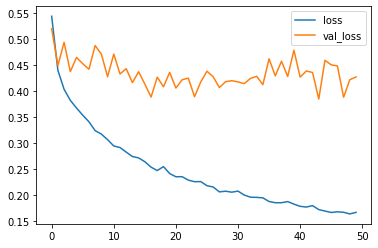

In [9]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

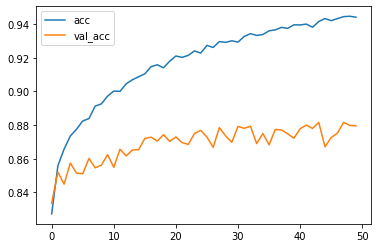

In [10]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[916   8  14   9   2   2   4   4  28  13]
 [  5 958   0   1   0   0   2   0   5  29]
 [ 29   1 809  39  24  31  53   8   3   3]
 [ 12   3  26 769  25  79  58  10  10   8]
 [  8   1  41  57 808  19  40  21   5   0]
 [  6   1  20 110  17 802  25  14   4   1]
 [  7   0  14  20   6   3 944   2   2   2]
 [  8   1   7  19  20  25   6 908   0   6]
 [ 23  12   3   6   0   0   2   0 942  12]
 [  8  35   2   3   1   1   3   0   7 940]]


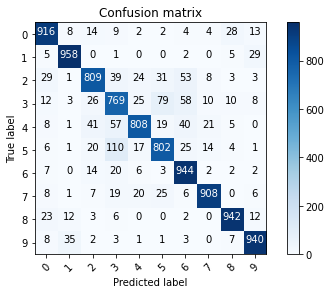

In [11]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization") 
  
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  
  plt.tight_layout()
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


In [12]:
# Label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

Text(0.5, 1.0, 'True label: ship Predicted: bird')

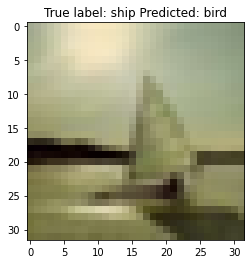

In [13]:
# Show some misclassified examples
# TODO: add label names
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))

In [14]:
# Now that the model is so large, it's useful to summarize it
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496 